# Global Power Plant Database
### Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database

### The database includes the following indicators:
	
-	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
-	`country_long` (text): longer form of the country designation
-	`name` (text): name or title of the power plant, generally in Romanized form
-	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
-	`capacity_mw` (number): electrical generating capacity in megawatts
-	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
-	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
-	`primary_fuel` (text): energy source used in primary electricity generation or export
-	`other_fuel1` (text): energy source used in electricity generation or export
-	`other_fuel2` (text): energy source used in electricity generation or export
-	`other_fuel3` (text): energy source used in electricity generation or export
-	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
-	`owner` (text): majority shareholder of the power plant, generally in Romanized form
-	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
-	`url` (text): web document corresponding to the `source` field
-	`geolocation_source` (text): attribution for geolocation information
-	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
-	`year_of_capacity_data` (number): year the capacity information was reported
-	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
-	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
-	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
-	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
-	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
-	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
-	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
-	`generation_data_source` (text): attribution for the reported generation information
-	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
-	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
-	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
-	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
-	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
-	`estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
-	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
-	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
-	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
-	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
### Prediction :   Make two prediction  1) **Primary Fuel**    2) **capacity_mw** 

### Dataset Link-
#### -	https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv


### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
import joblib
from joblib import dump
#########################CLASSIFICATION lIBRARIES######################################
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#########################REGRESSION lIBRARIES######################################
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


### Loading Dataset

In [2]:
df = pd.read_csv("global_power_plant.csv")

In [3]:
df.sample(5)

country country_long                         name   gppd_idnr  \
906     IND        India      iEnergy Theni Wind Farm  WRI1026761   
731     IND        India              SONE EAST CANAL  IND0000419   
159     IND        India                     DADRI GT  IND0000089   
251     IND        India  Gulabpura Solar Power Plant  WRI1026144   
4       IND        India                 AKALTARA TPP  IND0000002   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
906        16.50    9.9344    77.4768         Wind         NaN         NaN   
731         3.30       NaN        NaN        Hydro         NaN         NaN   
159       829.78   28.5932    77.6101          Gas         Oil         NaN   
251         5.00   25.8600    74.6567        Solar         NaN         NaN   
4        1800.00   21.9603    82.4091         Coal         Oil         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
906  ...                    NaN                  NaN                 NaN   
731  ...                 2019.0                  NaN                 NaN   
159  ...                 2019.0                  NaN             2462.00   
251  ...                    NaN                  NaN                 NaN   
4    ...                 2019.0                  NaN             3035.55   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
906                 NaN                 NaN                 NaN   
731                 NaN                 NaN                 NaN   
159             2924.00              2178.0         1575.000000   
251                 NaN                 NaN                 NaN   
4               5916.37              6243.0         5385.579736   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
906                  NaN                  NaN                            NaN   
731                  NaN                  NaN                            NaN   
159               1605.0                  NaN  Central Electricity Authority   
251                  NaN                  NaN                            NaN   
4                 7279.0                  NaN  Central Electricity Authority   

     estimated_generation_gwh  
906                       NaN  
731                       NaN  
159                       NaN  
251                       NaN  
4                         NaN  

[5 rows x 27 columns]

## EDA(Exploratory Data Analysis)

In [4]:
#checking the shape of dataset
print("There are {} rows and {} columns respectively present in the dataset.".format(*df.shape))

There are 907 rows and 27 columns respectively present in the dataset.


In [5]:
# checking columns in Dataset
print("These are the columns present in the dataset:  \n\n",df.columns)

These are the columns present in the dataset:  

 Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')


In [6]:
# checking duplicate values in the dataset
print("There are {} duplicates present in the dataset".format(df.duplicated().sum()))

There are 0 duplicates present in the dataset


In [7]:
# checking duplicate values in the dataset
print("There are {} Nulls present in the dataset".format(df.isnull().sum().sum()))

There are 10445 Nulls present in the dataset


In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

##### Observation:

##### Missing Data in Fuel Information:
Columns 'other_fuel1', 'other_fuel2', and 'other_fuel3' have a significant number of missing values (709, 906, and 907 out of 907, respectively). This suggests that most plants rely solely on the 'primary_fuel' and do not have additional fuel types specified.

##### Geolocation Data:
'latitude' and 'longitude' columns have 46 missing values each. This indicates that some power plants lack precise geographical coordinates.

##### Commissioning Year:
'commissioning_year' has 380 missing values, implying that information about the commissioning year is unavailable for a substantial number of power plants.

##### Ownership Information:
'owner' column has 565 missing values, indicating that ownership data is missing for a significant portion of the power plants.

##### Generation Data:
Columns 'generation_gwh_2013', 'generation_gwh_2019', and 'estimated_generation_gwh' have all values missing (907 out of 907). These columns appear to have no valid data.

##### Year of Capacity Data:
'year_of_capacity_data' has 388 missing values, suggesting that the availability of capacity data for specific years is incomplete.

##### Generation Data Source and Estimated Generation:
'generation_data_source' has 458 missing values, indicating that the source of generation data is missing for some power plants.
'estimated_generation_gwh' has all values missing (907 out of 907), implying that estimated generation data is not provided.

##### Wepp ID and Source Information:
'wepp_id' has all values missing (907 out of 907), indicating it might not be a relevant identifier for this dataset.
'geolocation_source' has 19 missing values, implying that the source of geolocation data is unavailable for a few power plants.

##### Generation Years:
Generation data from 'generation_gwh_2014' to 'generation_gwh_2018' has varying levels of missing values, suggesting incomplete or unavailable data for these years. 

**some columns like 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', and 'estimated_generation_gwh' seem to have no usable data and might not provide meaningful insights for analysis.**

<AxesSubplot:>

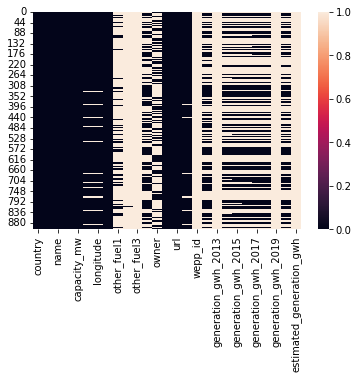

In [9]:
# Heatmap of null values
sns.heatmap(df.isnull())

**Observation:**

White space is indicating Missing Values are Presnt in The Dataset

In [10]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

##### Dataset Information

The dataset contains a total of 907 entries (rows) and 27 columns. The memory usage of the dataset is approximately 191.4 KB.

##### Data Types

The dataset consists of two main data types: `float64` (for numerical values) and `object` (for text and categorical values).

##### Missing Values

Many columns have missing values, as indicated by the difference between the total number of entries (907) and the non-null count for each column. Columns with complete data include: 'country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'primary_fuel', 'source', and 'url'.

##### Geographical Data

- 'latitude' and 'longitude' columns have missing values (46 out of 907), indicating that not all power plants have precise geographical coordinates.

##### Fuel Information

- 'primary_fuel' provides the primary type of fuel used by each power plant.
- 'other_fuel1', 'other_fuel2', and 'other_fuel3' columns have varying degrees of missing values, suggesting that additional fuel types are not commonly specified.

##### Commissioning Year

- 'commissioning_year' has missing values for a significant portion of the power plants (380 out of 907), indicating incomplete information about when the plants were commissioned.

##### Ownership Information

- 'owner' column has missing values for many power plants (565 out of 907), suggesting incomplete ownership information.

##### Generation Data

Columns related to generation data ('generation_gwh_2014' through 'generation_gwh_2018') have varying levels of missing values, indicating incomplete or unavailable data for those years.

##### Data Source and ID

- 'source' and 'geolocation_source' provide information about the sources of various data points, such as capacity and geolocation data.
- 'wepp_id' has all missing values, suggesting it may not be relevant or used in this dataset.
- 'generation_data_source' indicates the source of generation data, but it also has some missing values (458 out of 907).

##### Estimation and Null Data

Several columns, such as 'generation_gwh_2013', 'generation_gwh_2019', and 'estimated_generation_gwh', have all missing values, indicating that no valid data is available in these columns.


In [11]:
# checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

#### Number of Unique Values in Each Column

##### Categorical Columns

- 'country' and 'country_long' have only one unique value each. This suggests that all data entries belong to a single country.
- 'name' and 'gppd_idnr' have a total of 907 unique values, indicating that each power plant is uniquely identified.
- 'primary_fuel' has 8 unique values, representing different primary fuel types used by power plants.
- 'other_fuel1' and 'other_fuel2' have a small number of unique values (3 and 1, respectively).
- 'geolocation_source' has 3 unique values, representing different sources of geolocation data.
- 'owner' and 'source' have relatively larger numbers of unique values, indicating variations in ownership and data sources.
- 'url' has 304 unique values, indicating a variety of URLs associated with the power plants.

##### Numerical Columns

- 'capacity_mw' has 361 unique values, indicating a range of power plant capacities.
- 'latitude' and 'longitude' have a relatively large number of unique values, suggesting diverse geographical locations.
- 'commissioning_year' has 73 unique values, indicating a wide range of commissioning years.
- 'year_of_capacity_data' has only one unique value, suggesting uniformity in the available year of capacity data.

##### Generation Data

- Columns related to generation data ('generation_gwh_2014' through 'generation_gwh_2018') have varying numbers of unique values, suggesting variations in electricity generation over the years.

##### Unused or Zero-Valued Columns

- Columns 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', and 'estimated_generation_gwh' have zero unique values, implying these columns may not contain meaningful or used data.

Overall, the dataset contains diverse and unique information for various columns, with variations in fuel types, ownership, geographical locations, and generation data.


In [12]:
# checking the count of name
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

Here we can observe that the name column has unique name for each power plant so dropping this column is good for our model.

In [13]:
# checking the count of gppd-idnr
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

The column gppd_idnr also contains the unique ID of the power plant, so we can drop this column as well.

In [14]:
# checking the count of owner
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In owner column there are 565 missing values out of 907 values so i am deleteing this column ..

#####  Here's the list of columns that appear to be not usable for prediction

In [15]:
not_usable_columns = [
    'country',#it have only one unique value each. This suggests that all data entries belong to a single country.
    'country_long',#it have only one unique value each. This suggests that all data entries belong to a single country.
    'year_of_capacity_data',# it has only one unique value, suggesting uniformity in the available year of capacity data
    'other_fuel3',#it  have zero unique values, implying these columns may not contain meaningful or used data.
    'wepp_id',#it  have zero unique values, implying these columns may not contain meaningful or used data.
    'generation_gwh_2013',#it  have zero unique values, implying these columns may not contain meaningful or used data.
    'generation_gwh_2019',#it  have zero unique values, implying these columns may not contain meaningful or used data.
    'estimated_generation_gwh',#it  have zero unique values, implying these columns may not contain meaningful or used data.
    'generation_data_source',# it indicates the source of generation data, but it also has some missing values (458 out of 907)
    'name',# it contains unique name
    'gppd_idnr',# it contains unique id
    'url',#i dont think that url gives importance in prdiction
    'other_fuel2',#it has 906 null values out of 907 values
    'owner',#In owner column there are 565 missing values out of 907 values
    
    
]


In [16]:
df.drop(columns=not_usable_columns,axis=1, inplace=True)

In [17]:
df.head()

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0          2.5   28.1839    73.2407        Solar         NaN   
1         98.0   24.7663    74.6090         Coal         NaN   
2         39.2   21.9038    69.3732         Wind         NaN   
3        135.0   23.8712    91.3602          Gas         NaN   
4       1800.0   21.9603    82.4091         Coal         Oil   

   commissioning_year                                source  \
0              2011.0  National Renewable Energy Laboratory   
1                 NaN                  Ultratech Cement ltd   
2                 NaN                                   CDM   
3              2004.0         Central Electricity Authority   
4              2015.0         Central Electricity Authority   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory                  NaN   
1                                   WRI                  NaN   
2                                   WRI                  NaN   
3                                   WRI           617.789264   
4                                   WRI          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_gwh_2018  
0                  NaN  
1                  NaN  
2                  NaN  
3           626.239128  
4          7279.000000

In [18]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

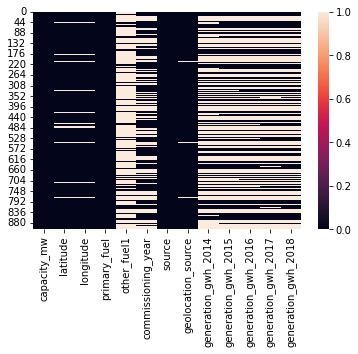

In [19]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

In [20]:
#checking columns after removing all unnecessary columns
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

#####  Separate categorical and numerical columns

In [21]:
# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [22]:
categorical_columns

Index(['primary_fuel', 'other_fuel1', 'source', 'geolocation_source'], dtype='object')

In [23]:
numerical_columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [24]:
# other_fuel1 - mode
# geolocation_source - mode
# source - mode
# latitude-mean
# longitude-mean
# commissioning_year-median
# generation_gwh_2014-median
# generation_gwh_2015-median
# generation_gwh_2016-median
# generation_gwh_2017-median
# generation_gwh_2018-median

##### Imputing Null Values

In [25]:
# Imputation techniques
impute_techniques = {
    'other_fuel1': 'mode',
    'geolocation_source': 'mode',
    'source':'mode',
    'latitude': 'mean',
    'longitude': 'mean',
    'commissioning_year': 'median',
    'generation_gwh_2014': 'median',
    'generation_gwh_2015': 'median',
    'generation_gwh_2016': 'median',
    'generation_gwh_2017': 'median',
    'generation_gwh_2018': 'median'
}

# Impute based on defined techniques
for column, technique in impute_techniques.items():
    if technique == 'mode':
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    elif technique == 'mean':
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    elif technique == 'median':
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

df.sample(5)

capacity_mw   latitude  longitude primary_fuel other_fuel1  \
148        240.0  30.555900  77.791500        Hydro         Oil   
596        234.0  16.332800  77.703600        Hydro         Oil   
106        165.0  10.074000  76.318800          Gas         Oil   
4         1800.0  21.960300  82.409100         Coal         Oil   
776          6.0  21.197918  77.464907         Wind         Oil   

     commissioning_year                         source geolocation_source  \
148              1975.0  Central Electricity Authority                WRI   
596              2009.0  Central Electricity Authority                WRI   
106              1999.0  Central Electricity Authority                WRI   
4                2015.0  Central Electricity Authority                WRI   
776              2001.0                            CDM                WRI   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
148           867.739500           809.711100            710.43000   
596           223.526750            30.267900            210.93005   
106           145.560000             3.417200              0.00000   
4            3035.550000          5916.370000           6243.00000   
776           801.123775           711.181225            737.20545   

     generation_gwh_2017  generation_gwh_2018  
148           779.652150           805.482350  
596           216.313000           164.175000  
106            60.718000             0.000000  
4            5385.579736          7279.000000  
776           817.977250           751.644375

In [26]:
#after filling null values
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

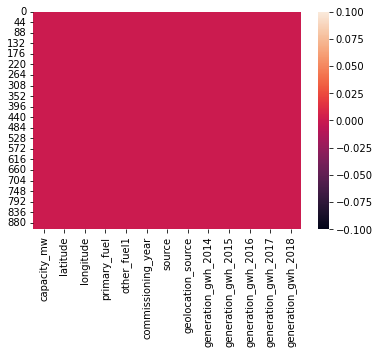

In [27]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

**Hurre** here we filled all the null values

##### Now its time to describe data


In [28]:
# Statistical summary of dataset
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.197918   77.464907         1998.728776   
std     590.085456    6.079148    4.812291           13.158621   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1998.000000   
50%      59.200000   21.281800   76.979200         2001.000000   
75%     385.250000   25.176450   79.206100         2003.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           907.000000           907.000000           907.000000   
mean           1516.689956          1510.071296          1565.361383   
std            2785.604307          2984.994556          3005.087210   
min               0.000000             0.000000             0.000000   
25%             801.123775           711.181225           737.205450   
50%             801.123775           711.181225           737.205450   
75%             801.123775           711.181225           737.205450   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000  
mean           1657.121797          1665.011030  
std            3046.862910          3168.826750  
min               0.000000             0.000000  
25%             817.977250           751.644375  
50%             817.977250           751.644375  
75%             817.977250           751.644375  
max           35116.000000         35136.000000

### Observations on Summary Statistics

Here are some observations based on the summary statistics for the provided columns in the dataset:

1. **Capacity (capacity_mw):** The capacity of power plants varies significantly, with a range from 0.00 MW to a maximum of 4760.00 MW. The average capacity is approximately 326.22 MW, and the distribution has a relatively high standard deviation of 590.08 MW, indicating a wide spread of capacity values.

2. **Geographical Coordinates (latitude and longitude):** The latitude values range from 8.17 to 34.65, and the longitude values range from 68.64 to 95.41. These coordinates represent the locations of the power plants. The distribution of both latitude and longitude appears to be relatively spread out, which is expected due to the diverse geographical locations.

3. **Commissioning Year (commissioning_year):** The power plants in the dataset were commissioned over a range of years, from 1927 to 2018. The average commissioning year is around 1998.73, suggesting that most of the power plants were established in the late 20th century and early 21st century.

4. **Generation (generation_gwh_2014 to generation_gwh_2018):** The generation values for different years show a significant variation. For instance, generation in 2014 ranges from 0.00 GWh to 28127.00 GWh, with an average of approximately 1516.69 GWh. The subsequent years (2015 to 2018) exhibit similar patterns, with varying averages and standard deviations.

These observations provide insights into the distribution and characteristics of the numerical columns in the dataset. The wide ranges, high standard deviations, and varying averages in some columns indicate the diversity and heterogeneity of the data, which can impact subsequent analyses and decision-making processes.


##### Checking Skewness

In [29]:
#Checking Skewness
skewness = df.skew()
skewness

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.719575
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

### Observations on Skewness of Numerical Columns

Skewness is a measure of the asymmetry of a probability distribution. Positive skewness indicates that the distribution has a tail on the right side, while negative skewness indicates a tail on the left side. Here are some observations based on the calculated skewness values for the numerical columns in the dataset:

1. **Capacity (capacity_mw):** The capacity column has a positive skewness of approximately 3.12. This indicates that the distribution of capacity values is skewed to the right, suggesting that there might be a few power plants with very high capacity values, leading to a long right tail.

2. **Geographical Coordinates (latitude and longitude):** The latitude column has a slightly negative skewness of about -0.15, indicating a very slight left skew. The longitude column, on the other hand, has a positive skewness of around 1.14, suggesting a right-skewed distribution. These slight skews might be due to the geographical diversity of power plant locations.

3. **Commissioning Year (commissioning_year):** The commissioning year column has a notable negative skewness of approximately -1.72. This suggests that there might be a concentration of power plants commissioned in more recent years, leading to a left-skewed distribution.

4. **Generation (generation_gwh_2014 to generation_gwh_2018):** The generation columns (2014 to 2018) all exhibit strong positive skewness values, ranging from about 5.13 to 5.57. These high positive skews indicate that the distribution of generation values is highly skewed to the right, possibly indicating a few power plants with significantly higher generation values.

These skewness observations provide insights into the distribution shapes of the numerical columns. Understanding skewness is important for making appropriate data transformations or modeling decisions in subsequent analyses.


### Taking Insigts By Visualizing The Data

#### capacity_mw

In [30]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

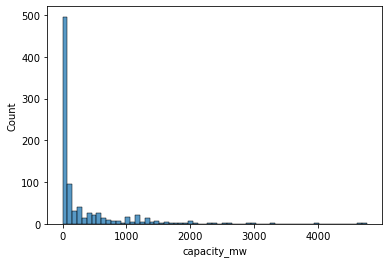

In [31]:
sns.histplot(df['capacity_mw'])

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

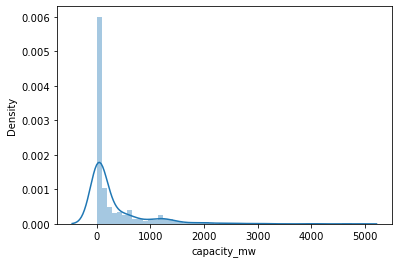

In [32]:
sns.distplot(df['capacity_mw'])

capacity_mw IS right skewed

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

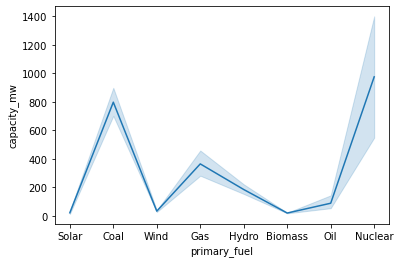

In [33]:
sns.lineplot(x='primary_fuel',y='capacity_mw',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

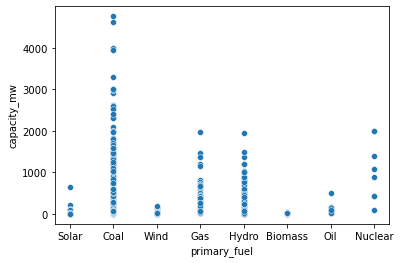

In [34]:
sns.scatterplot(x='primary_fuel',y='capacity_mw', data=df)

there are high electrical generating capacity on **capacity_mw** on **coal**, **gas** ,**Hydro** and **Nuclear**

#### latitude and longitude

In [35]:
colordict = {'Hydro': '#6495ED', 'Fossil': '#DEB887', 'Nuclear': '#CD5C5C', 'Other_renewable': '#90EE90', 'Wind': '#20B2AA', 'Other': '#BDB76B', 'Solar': '#FFD700'}
hoverD = {'capacity_mw': True, 'latitude': False, 'longitude': False, 'primary_fuel': True, 'other_fuel1': True,
          'commissioning_year': True, 'geolocation_source': True,'source': True,
          'generation_gwh_2014': True, 'generation_gwh_2015': True, 'generation_gwh_2016': True,
          'generation_gwh_2017': True, 'generation_gwh_2018': True}

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="primary_fuel", size="capacity_mw", hover_name="primary_fuel", hover_data=hoverD,
                        color_discrete_map=colordict, size_max=15, zoom=2, title='Power Generation Capacity INDIA')
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout({'showlegend': True, 'legend': {'title': 'Fuel Type'}})

fig.show()

based on the longitude and latitude Power Generation Capacity INDIA

#### primary_fuel

In [36]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

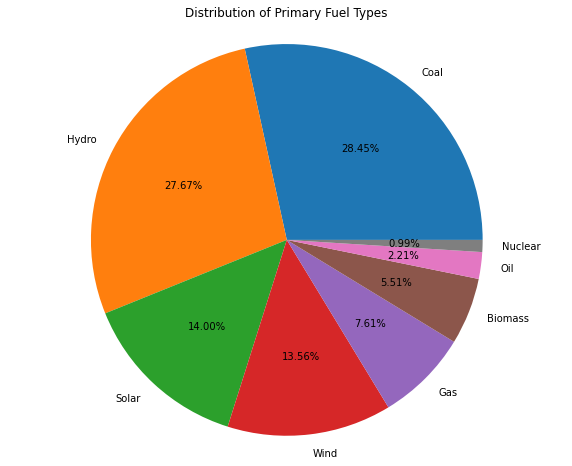

In [37]:
plt.figure(figsize=(10, 8))
plt.pie(df['primary_fuel'].value_counts().values, labels=df['primary_fuel'].value_counts().index, autopct='%1.2f%%')

plt.title('Distribution of Primary Fuel Types')
plt.axis('equal') 

plt.show()

Coal and Hydro has maximum shares

<AxesSubplot:xlabel='primary_fuel', ylabel='commissioning_year'>

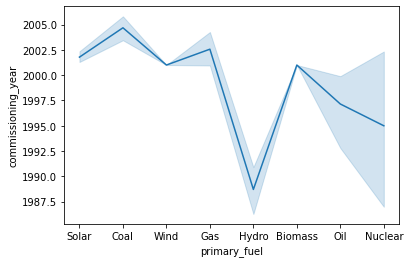

In [38]:
sns.lineplot(x='primary_fuel',y='commissioning_year',data=df)

#### other_fuel1

In [39]:
df['other_fuel1'].value_counts()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

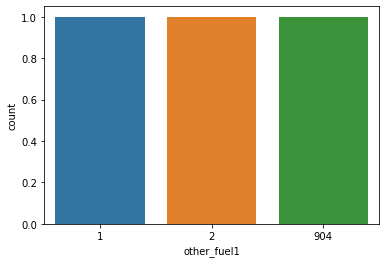

In [40]:
sns.countplot(df['other_fuel1'].value_counts())

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

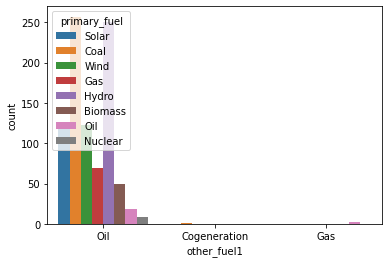

In [41]:
sns.countplot('other_fuel1',hue='primary_fuel',data=df)

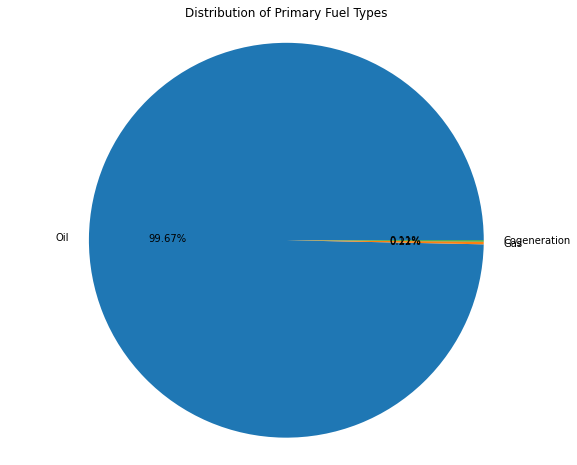

In [42]:
plt.figure(figsize=(10, 8))
plt.pie(df['other_fuel1'].value_counts().values, labels=df['other_fuel1'].value_counts().index, autopct='%1.2f%%')

plt.title('Distribution of Primary Fuel Types')
plt.axis('equal') 

plt.show()

in **other_fuel1** Oil has 99.67 unique values

#### commissioning_year

In [43]:
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

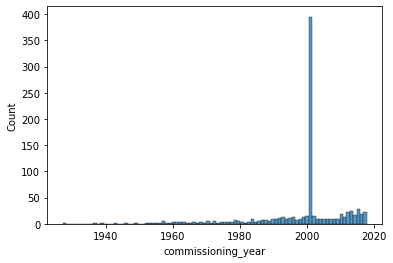

In [44]:
sns.histplot(df['commissioning_year'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

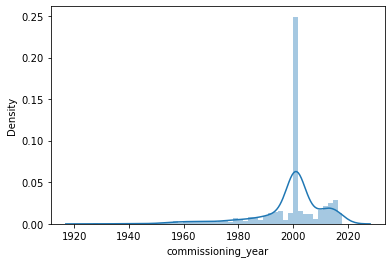

In [45]:
sns.distplot(df['commissioning_year'])

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

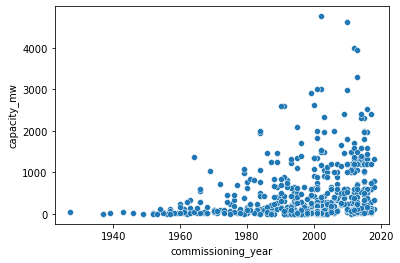

In [46]:
sns.scatterplot(x='commissioning_year',y='capacity_mw', data=df)

as commissioning_year are increasing capacity_mv also increasing

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

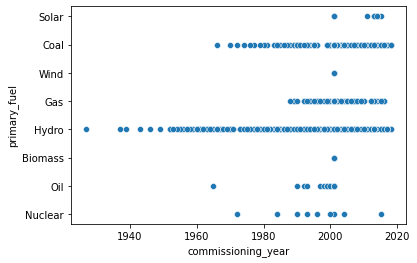

In [47]:
sns.scatterplot(x='commissioning_year',y='primary_fuel', data=df)

#### geolocation_source

In [48]:
df['geolocation_source'].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

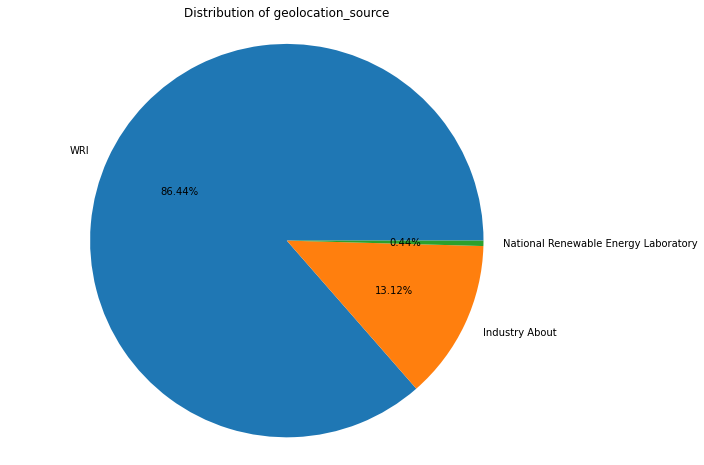

In [49]:
plt.figure(figsize=(10, 8))
plt.pie(df['geolocation_source'].value_counts().values, labels=df['geolocation_source'].value_counts().index, autopct='%1.2f%%')

plt.title('Distribution of geolocation_source')
plt.axis('equal') 

plt.show()

in geolocation_source columns there are 86.44% values are WRI  , 13.12% are indusrty about , 0.44% are National Renewable Energy Laboratory

#### 'generation_gwh_2014' ,  'generation_gwh_2015' ,  'generation_gwh_2016' , 'generation_gwh_2017' ,  'generation_gwh_2018'

In [50]:
Generation = ['generation_gwh_2014' , 'generation_gwh_2015' , 'generation_gwh_2016' , 'generation_gwh_2017' , 'generation_gwh_2018']


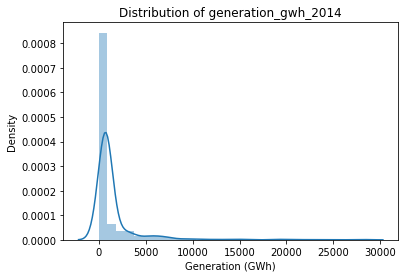

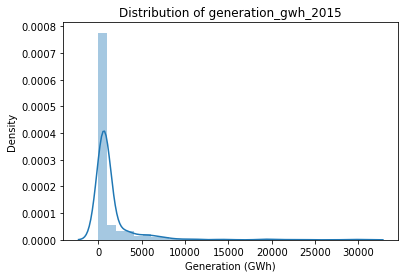

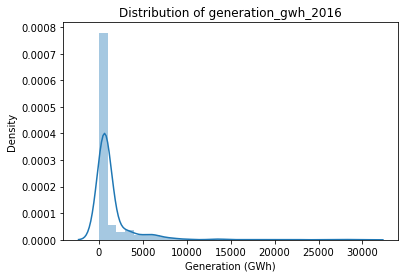

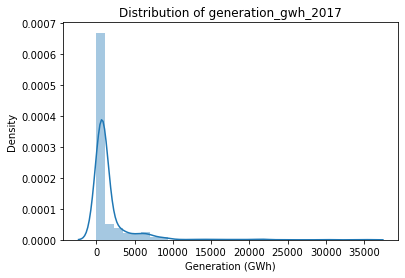

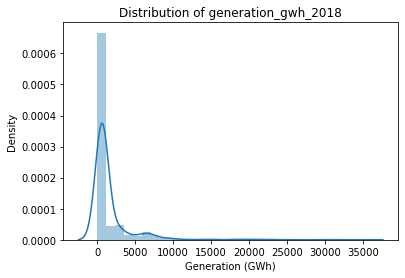

In [51]:
for i in Generation:
    sns.distplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.xlabel('Generation (GWh)')
    plt.ylabel('Density')
    plt.show()

They are all highly positive skewed possibly indicating a few power plants with significantly higher generation values.

### Multivariate Analysis

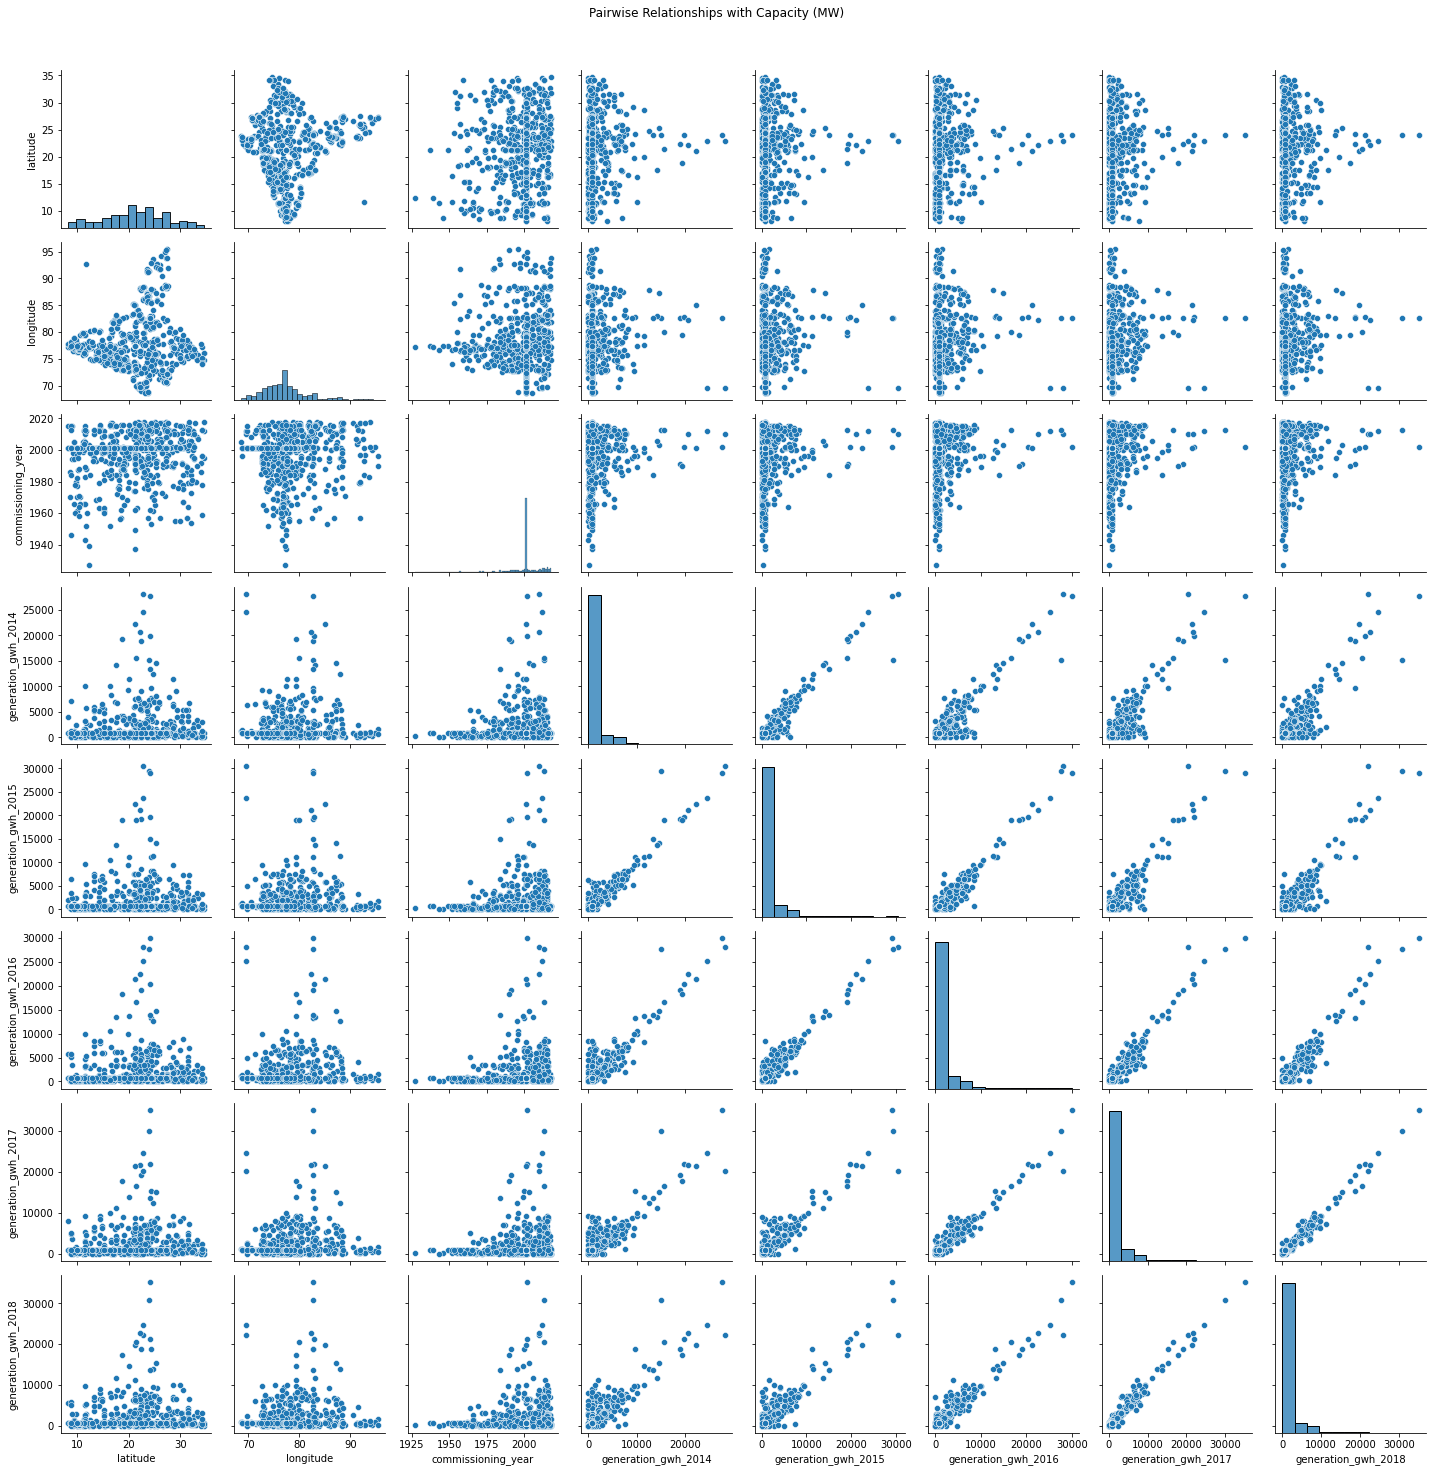

In [52]:
# Create a scatter plot matrix
sns.pairplot(df, vars=['latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015',
                      'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'], kind='scatter')

# Set titles and adjust layout
plt.suptitle('Pairwise Relationships with Capacity (MW)', y=1.02)
plt.tight_layout()

# Show the scatter plot matrix
plt.show()


- We can see that the most of columns are highly correlated with each other
- most of columns have strong linear relationship
- there are lots of Outliers are present

### Cleaning Data

### 1. Encoding the categorical columns using Label Encoding

In [53]:
categorical_col = ['primary_fuel', 'other_fuel1','source','geolocation_source']

In [54]:
LE = LabelEncoder()
df[categorical_col]=df[categorical_col].apply(LE.fit_transform)

In [55]:
df.head()

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0          2.5   28.1839    73.2407             6            2   
1         98.0   24.7663    74.6090             1            2   
2         39.2   21.9038    69.3732             7            2   
3        135.0   23.8712    91.3602             2            2   
4       1800.0   21.9603    82.4091             1            2   

   commissioning_year  source  geolocation_source  generation_gwh_2014  \
0              2011.0     109                   1           801.123775   
1              2001.0     174                   2           801.123775   
2              2001.0      21                   2           801.123775   
3              2004.0      22                   2           617.789264   
4              2015.0      22                   2          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0           711.181225           737.205450           817.977250   
1           711.181225           737.205450           817.977250   
2           711.181225           737.205450           817.977250   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  
0           751.644375  
1           751.644375  
2           751.644375  
3           626.239128  
4          7279.000000

In [56]:


'''
0-Biomass
1-coal
2-gas
3-hydro
4-nuclear
5-oil
6-solar
7-wind

'''

'\n0-Biomass\n1-coal\n2-gas\n3-hydro\n4-nuclear\n5-oil\n6-solar\n7-wind\n\n'

### 2.Handling Outliers

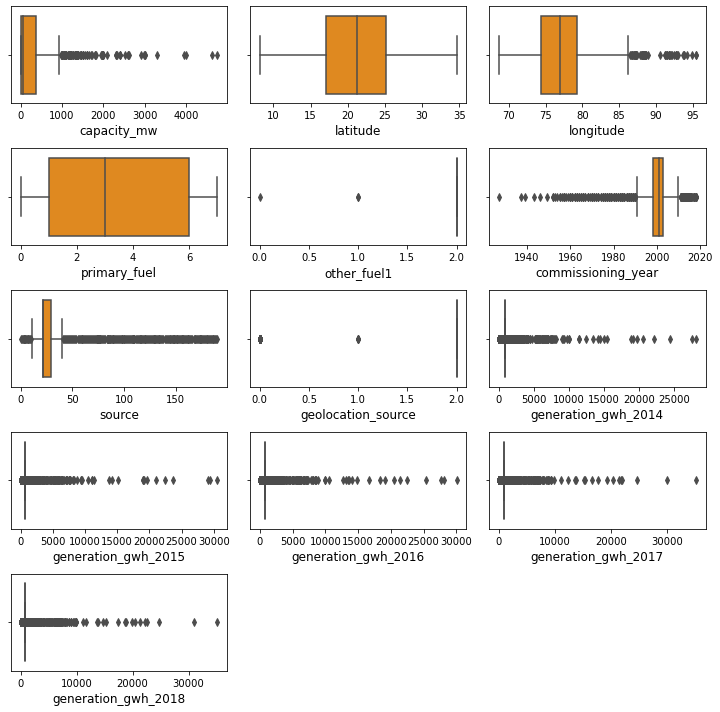

In [57]:
# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

 We can see that there are lots of outliers present in approx every column

##### Handling Outliers By Z score

In [58]:
clolumns_to_be_handle = df[[  'longitude',
                            'other_fuel1',
                            'commissioning_year',
                            'source', 'geolocation_source',
                            'generation_gwh_2014',
                            'generation_gwh_2015',
                            'generation_gwh_2016',
                           'generation_gwh_2017',
                           'generation_gwh_2018']]

In [59]:
z=np.abs(zscore(clolumns_to_be_handle))
z

longitude  other_fuel1  commissioning_year    source  geolocation_source  \
0     0.878280     0.054303            0.933076  1.460215            1.083349   
1     0.593788     0.054303            0.172699  2.917019            0.394241   
2     1.682394     0.054303            0.172699  0.512075            0.394241   
3     2.889052     0.054303            0.400812  0.489662            0.394241   
4     1.027976     0.054303            1.237227  0.489662            0.394241   
..         ...          ...                 ...       ...                 ...   
902   0.022477     0.054303            1.313265  0.489662            0.394241   
903   0.145644     0.054303            0.172699  0.743019            2.560940   
904   0.391673     0.054303            0.172699  0.512075            0.394241   
905   0.772866     0.054303            0.172699  0.339596            0.394241   
906   0.002473     0.054303            0.172699  0.512075            0.394241   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0               0.257022             0.267783             0.275737   
1               0.257022             0.267783             0.275737   
2               0.257022             0.267783             0.275737   
3               0.322873             0.223348             0.226194   
4               0.545554             1.476964             1.557432   
..                   ...                  ...                  ...   
902             0.257022             0.505833             0.443415   
903             0.257022             0.267783             0.275737   
904             0.257022             0.267783             0.275737   
905             0.257022             0.267783             0.275737   
906             0.257022             0.267783             0.275737   

     generation_gwh_2017  generation_gwh_2018  
0               0.275565             0.288394  
1               0.275565             0.288394  
2               0.275565             0.288394  
3               0.326203             0.327990  
4               1.224379             1.772608  
..                   ...                  ...  
902             0.259992             0.308963  
903             0.275565             0.288394  
904             0.275565             0.288394  
905             0.275565             0.288394  
906             0.275565             0.288394  

[907 rows x 10 columns]

In [60]:
# creating new dataframe

df= df[(z<3).all(axis=1)]
df

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0            2.5   28.1839    73.2407             6            2   
1           98.0   24.7663    74.6090             1            2   
2           39.2   21.9038    69.3732             7            2   
3          135.0   23.8712    91.3602             2            2   
4         1800.0   21.9603    82.4091             1            2   
..           ...       ...        ...           ...          ...   
902       1600.0   16.2949    77.3568             1            2   
903          3.0   12.8932    78.1654             6            2   
904         25.5   15.2758    75.5811             7            2   
905         80.0   24.3500    73.7477             1            2   
906         16.5    9.9344    77.4768             7            2   

     commissioning_year  source  geolocation_source  generation_gwh_2014  \
0                2011.0     109                   1           801.123775   
1                2001.0     174                   2           801.123775   
2                2001.0      21                   2           801.123775   
3                2004.0      22                   2           617.789264   
4                2015.0      22                   2          3035.550000   
..                  ...     ...                 ...                  ...   
902              2016.0      22                   2           801.123775   
903              2001.0      77                   0           801.123775   
904              2001.0      21                   2           801.123775   
905              2001.0      59                   2           801.123775   
906              2001.0      21                   2           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  
0             751.644375  
1             751.644375  
2             751.644375  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903           751.644375  
904           751.644375  
905           751.644375  
906           751.644375  

[833 rows x 13 columns]

##### Checking DAta Loss

In [61]:
# checking the data loss
data_loss = (907-833)/907*100
data_loss

8.158765159867695

### Heat Map

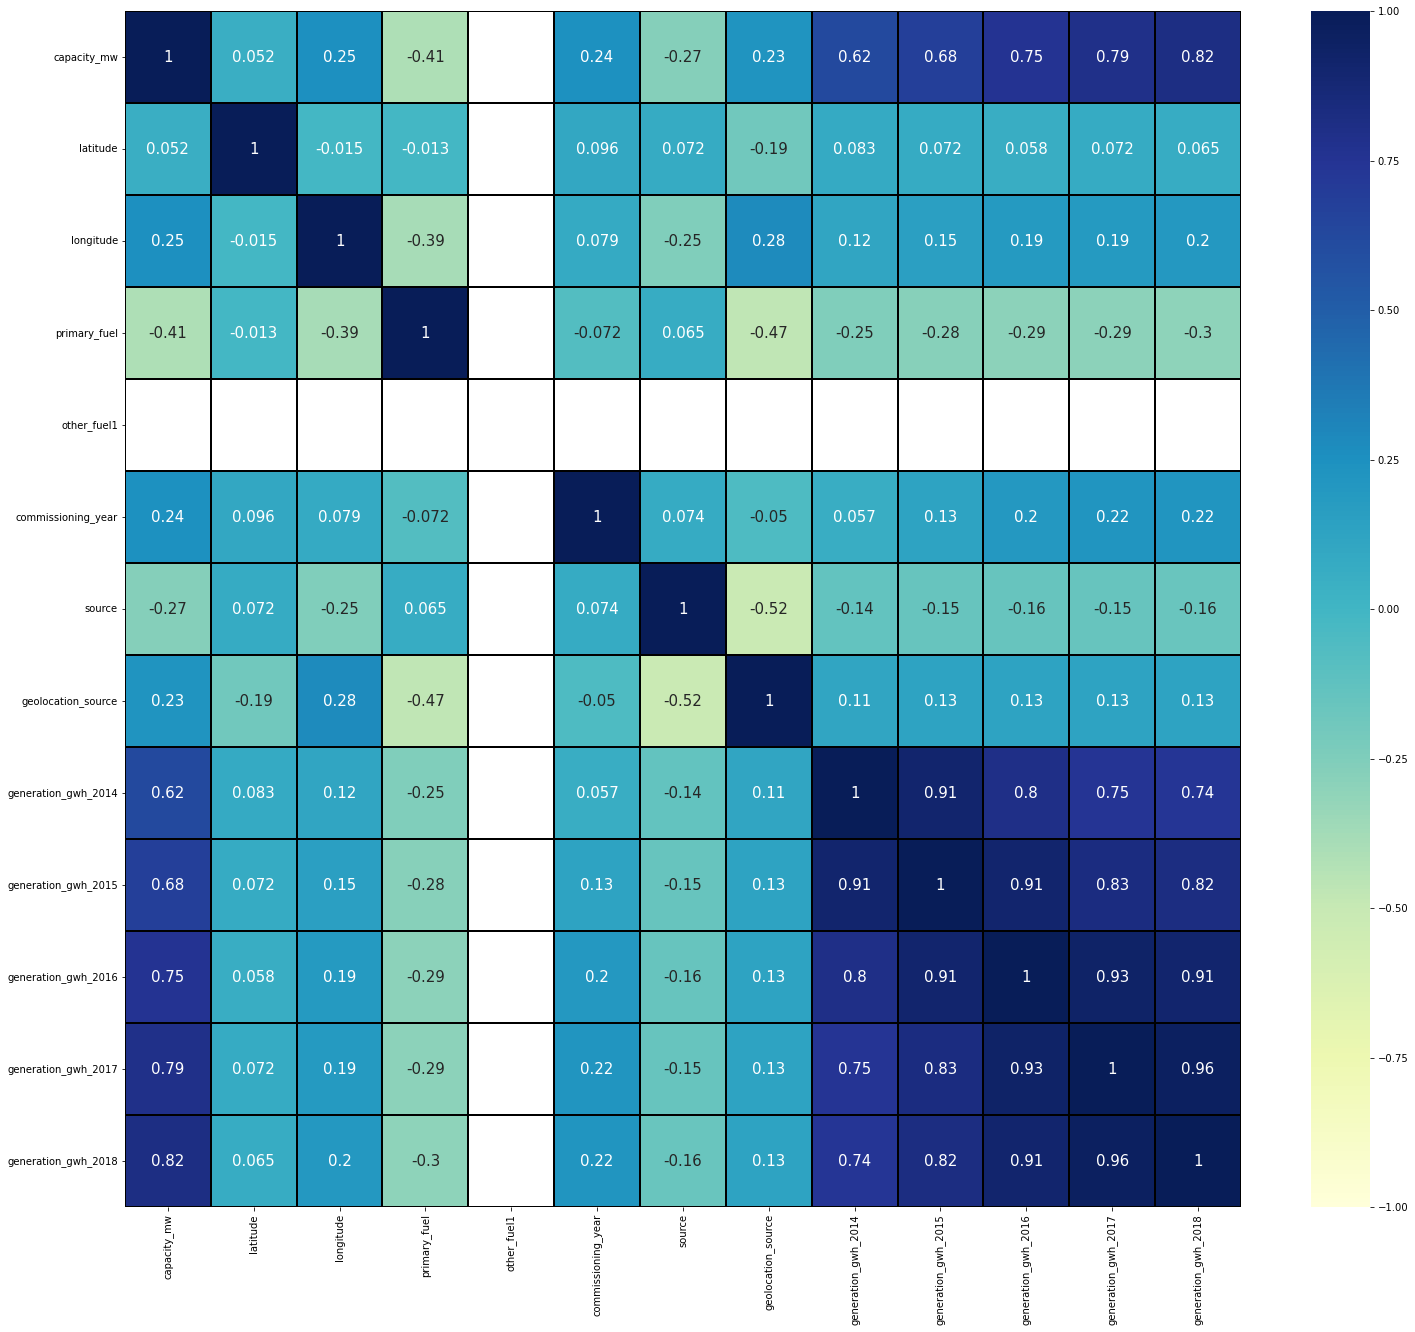

In [62]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

### 3.Checking Correlation with Target Column

In [63]:
#correlation with target column
correlation_with_quality = df.corr()['capacity_mw'].abs().sort_values(ascending=False)
print(correlation_with_quality)

capacity_mw            1.000000
generation_gwh_2018    0.815893
generation_gwh_2017    0.789653
generation_gwh_2016    0.750619
generation_gwh_2015    0.681289
generation_gwh_2014    0.620033
primary_fuel           0.408854
source                 0.268891
longitude              0.254214
commissioning_year     0.244299
geolocation_source     0.234034
latitude               0.051560
other_fuel1                 NaN
Name: capacity_mw, dtype: float64


In [64]:
#correlation with target column
correlation_with_quality = df.corr()['primary_fuel'].abs().sort_values(ascending=False)
print(correlation_with_quality)

primary_fuel           1.000000
geolocation_source     0.471799
capacity_mw            0.408854
longitude              0.389679
generation_gwh_2018    0.303930
generation_gwh_2017    0.294567
generation_gwh_2016    0.291554
generation_gwh_2015    0.280704
generation_gwh_2014    0.254123
commissioning_year     0.071653
source                 0.065295
latitude               0.012943
other_fuel1                 NaN
Name: primary_fuel, dtype: float64


we can see that  other_fuel1 is is no correlated with target columns so we will delete this column

In [65]:
# dropping irrelevant columns
df.drop('other_fuel1',axis=1,inplace=True)

### 4.Checking Correlation between columns to columns

In [66]:
#schecking correlation
df_corr = df.corr()
df_corr

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.051560   0.254214     -0.408854   
latitude                0.051560  1.000000  -0.015434     -0.012943   
longitude               0.254214 -0.015434   1.000000     -0.389679   
primary_fuel           -0.408854 -0.012943  -0.389679      1.000000   
commissioning_year      0.244299  0.096337   0.078615     -0.071653   
source                 -0.268891  0.072090  -0.250857      0.065295   
geolocation_source      0.234034 -0.194814   0.277772     -0.471799   
generation_gwh_2014     0.620033  0.082703   0.115115     -0.254123   
generation_gwh_2015     0.681289  0.072170   0.149735     -0.280704   
generation_gwh_2016     0.750619  0.057637   0.191064     -0.291554   
generation_gwh_2017     0.789653  0.071781   0.192532     -0.294567   
generation_gwh_2018     0.815893  0.064655   0.199978     -0.303930   

                     commissioning_year    source  geolocation_source  \
capacity_mw                    0.244299 -0.268891            0.234034   
latitude                       0.096337  0.072090           -0.194814   
longitude                      0.078615 -0.250857            0.277772   
primary_fuel                  -0.071653  0.065295           -0.471799   
commissioning_year             1.000000  0.074102           -0.049901   
source                         0.074102  1.000000           -0.521141   
geolocation_source            -0.049901 -0.521141            1.000000   
generation_gwh_2014            0.057465 -0.138855            0.113295   
generation_gwh_2015            0.128293 -0.153684            0.125394   
generation_gwh_2016            0.197630 -0.156064            0.127336   
generation_gwh_2017            0.221703 -0.153454            0.125207   
generation_gwh_2018            0.219953 -0.162739            0.132783   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.620033             0.681289   
latitude                        0.082703             0.072170   
longitude                       0.115115             0.149735   
primary_fuel                   -0.254123            -0.280704   
commissioning_year              0.057465             0.128293   
source                         -0.138855            -0.153684   
geolocation_source              0.113295             0.125394   
generation_gwh_2014             1.000000             0.912051   
generation_gwh_2015             0.912051             1.000000   
generation_gwh_2016             0.800868             0.907741   
generation_gwh_2017             0.745884             0.830112   
generation_gwh_2018             0.737667             0.821349   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.750619             0.789653   
latitude                        0.057637             0.071781   
longitude                       0.191064             0.192532   
primary_fuel                   -0.291554            -0.294567   
commissioning_year              0.197630             0.221703   
source                         -0.156064            -0.153454   
geolocation_source              0.127336             0.125207   
generation_gwh_2014             0.800868             0.745884   
generation_gwh_2015             0.907741             0.830112   
generation_gwh_2016             1.000000             0.932665   
generation_gwh_2017             0.932665             1.000000   
generation_gwh_2018             0.913488             0.964354   

                     generation_gwh_2018  
capacity_mw                     0.815893  
latitude                        0.064655  
longitude                       0.199978  
primary_fuel                   -0.303930  
commissioning_year              0.219953  
source                         -0.162739  
geolocation_source              0.132783  
generation_gwh_2014             0.737667  
generation_gwh_2015             0.821349  
generation_gwh_2016      

#### We are writing this function to see those columns which are highly correlated with each other

In [67]:
correlation_threshold = 0.85
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [68]:
features_to_drop

{'generation_gwh_2015', 'generation_gwh_2017', 'generation_gwh_2018'}

These columns are highly correlated with each other

In [69]:
df.drop(columns=['generation_gwh_2015', 'generation_gwh_2017', 'generation_gwh_2018'],axis=1, inplace=True)

#### Here i am copying dataframe because in this project i have to make two prediction ```capacity_mw``` and ```Primary Fule``` 

In [70]:
df1 = df.copy()

### Checking VIF accprding to capacity_mw

### VIF

In [71]:
#selecting only numerical columns
num=df.select_dtypes(np.number)

In [72]:
#drop target column
num.drop('capacity_mw',axis=1, inplace=True)

In [73]:
num.columns

Index(['latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2016'],
      dtype='object')

In [74]:
#scaling data
sc=StandardScaler()
standard=sc.fit_transform(num)

In [75]:
standard=pd.DataFrame(standard, columns=num.columns)

In [76]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [77]:
VIF

features       vif
0             latitude  1.073500
1            longitude  1.272987
2         primary_fuel  1.701859
3   commissioning_year  1.097841
4               source  1.591560
5   geolocation_source  1.988024
6  generation_gwh_2014  2.914009
7  generation_gwh_2016  3.105628

there is no multicolinearity 

# Predicting capacity_mw

### Splitting into Feature and Target column

In [78]:
X= df.drop('capacity_mw', axis=1)
Y=df['capacity_mw']

#### removing Skewness

In [79]:
X.skew()

latitude              -0.125859
longitude              0.904136
primary_fuel           0.419979
commissioning_year    -1.263321
source                 1.782665
geolocation_source    -2.102192
generation_gwh_2014    2.907554
generation_gwh_2016    2.610557
dtype: float64

#### Transformed by Power Transformer

In [80]:
transformed=power_transform(X)

In [81]:
pd.DataFrame(transformed).skew()

0   -0.071949
1   -0.000585
2   -0.055416
3   -0.312069
4   -0.178437
5   -2.074065
6    0.225782
7    0.143408
dtype: float64

### Standardization

In [82]:
sc=StandardScaler()

In [83]:
X=sc.fit_transform(transformed)

### Model Training

#### Find best Randomstate

In [84]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= RandomForestRegressor()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8473082473870167 on Random State = 40


In [85]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.20,random_state=maxRS)

#### Defining All Regression Models

In [86]:
# Create instances of regression models
LR_model = LinearRegression()
RFR_model = RandomForestRegressor()
GB_model = GradientBoostingRegressor()
ADA_model = AdaBoostRegressor()
Bag_model = BaggingRegressor()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()

# Create a list of regression models
model = [LR_model, RFR_model, GB_model, ADA_model, Bag_model, DT_model, KNR_model]

#### Model training

In [87]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_train = reg_model.score(x_train, y_train)
    pred = reg_model.predict(x_test)
    r2_test = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    
    print('Model:', reg_model)
    print('R-squared (Train):', r2_train)
    print('R-squared (Test):', r2_test)
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('*' * 30)

Model: LinearRegression()
R-squared (Train): 0.5030465665115729
R-squared (Test): 0.4545732505303468
Mean Squared Error (MSE): 73483.3727453507
Mean Absolute Error (MAE): 214.29475266828035
******************************
Model: RandomForestRegressor()
R-squared (Train): 0.9598881519327249
R-squared (Test): 0.8380797929546784
Mean Squared Error (MSE): 21814.923710443625
Mean Absolute Error (MAE): 77.74399246827515
******************************
Model: GradientBoostingRegressor()
R-squared (Train): 0.9322291772583123
R-squared (Test): 0.8119104223180384
Mean Squared Error (MSE): 25340.62834240987
Mean Absolute Error (MAE): 90.96249622732171
******************************
Model: AdaBoostRegressor()
R-squared (Train): 0.6337092738927703
R-squared (Test): 0.40938262797319547
Mean Squared Error (MSE): 79571.74183467489
Mean Absolute Error (MAE): 259.41171660859504
******************************
Model: BaggingRegressor()
R-squared (Train): 0.943516640610935
R-squared (Test): 0.821692104384300

#### CrossValidation

In [88]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_test = r2_score(y_test, reg_model.predict(x_test))
    
    cv_r2 = cross_val_score(reg_model, X, Y, cv=5, scoring='r2').mean()
    
    print('Model:', reg_model)
    print('R-squared (Test):', r2_test)
    print(f'Cross-validation R-squared:', cv_r2)
    print('*' * 50)

Model: LinearRegression()
R-squared (Test): 0.4545732505303468
Cross-validation R-squared: 0.48647004135613725
**************************************************
Model: RandomForestRegressor()
R-squared (Test): 0.8464290031129256
Cross-validation R-squared: 0.7417474982889138
**************************************************
Model: GradientBoostingRegressor()
R-squared (Test): 0.8094470028635385
Cross-validation R-squared: 0.7282654080289763
**************************************************
Model: AdaBoostRegressor()
R-squared (Test): 0.09333023796055273
Cross-validation R-squared: 0.46144996625128476
**************************************************
Model: BaggingRegressor()
R-squared (Test): 0.76359374639834
Cross-validation R-squared: 0.7074353776279709
**************************************************
Model: DecisionTreeRegressor()
R-squared (Test): 0.6821850892459076
Cross-validation R-squared: 0.5323767496721781
**************************************************
Model: KNeigh

##### Random Forest Regressor is beast model

#### Hyperparameter tuning on RandomForest Regressor

In [89]:
n_estimator= [50,100,200] 
max_features= ['auto','sqrt']  
max_depth=[None, 10, 20]  
min_samples_split= [2, 5, 10] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [50, 100, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 4, 7]}

In [90]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [91]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=5,
                      n_estimators=50)

In [92]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [93]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.8383896005781863

#### Saving the Model

In [94]:
joblib.dump(grid_search.best_estimator_,"GPPD_capacity_mw.pkl")

['GPPD_capacity_mw.pkl']

In [95]:
#####################################################################################################

## 2.PREDICTING primary_fuel

### VIF

In [96]:
df1.head()

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  source  \
0          2.5   28.1839    73.2407             6              2011.0     109   
1         98.0   24.7663    74.6090             1              2001.0     174   
2         39.2   21.9038    69.3732             7              2001.0      21   
3        135.0   23.8712    91.3602             2              2004.0      22   
4       1800.0   21.9603    82.4091             1              2015.0      22   

   geolocation_source  generation_gwh_2014  generation_gwh_2016  
0                   1           801.123775           737.205450  
1                   2           801.123775           737.205450  
2                   2           801.123775           737.205450  
3                   2           617.789264           886.004428  
4                   2          3035.550000          6243.000000

In [98]:
# selecting only numerical columns
num=df1.select_dtypes(np.number)

In [99]:
#Drop target column
num.drop('primary_fuel',axis=1, inplace=True)

In [100]:
num.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2016'],
      dtype='object')

In [101]:
#Scaling Data
sc=StandardScaler()
standard=sc.fit_transform(num)

In [102]:
standard=pd.DataFrame(standard, columns=num.columns)

In [103]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [104]:
VIF

features       vif
0          capacity_mw  2.580811
1             latitude  1.062325
2            longitude  1.151164
3   commissioning_year  1.136396
4               source  1.452781
5   geolocation_source  1.490254
6  generation_gwh_2014  2.922730
7  generation_gwh_2016  4.048358

Multicolinearity is in controll

#### Splitting into Feature and Target column

In [105]:
X= df1.drop('primary_fuel', axis=1)
Y=df1['primary_fuel']

#### removing Skewness

In [106]:
X.skew()

capacity_mw            2.140554
latitude              -0.125859
longitude              0.904136
commissioning_year    -1.263321
source                 1.782665
geolocation_source    -2.102192
generation_gwh_2014    2.907554
generation_gwh_2016    2.610557
dtype: float64

#### Transformed by Power Transformer

In [107]:
transformed=power_transform(X)

In [108]:
pd.DataFrame(transformed).skew()

0    0.013472
1   -0.071949
2   -0.000585
3   -0.312069
4   -0.178437
5   -2.074065
6    0.225782
7    0.143408
dtype: float64

### Standardization

In [109]:
sc=StandardScaler()

In [110]:
X=sc.fit_transform(transformed)

#### Data Balancing

In [111]:
#Data Balancing Using Smote
sm=SMOTE()

In [112]:
x,y=sm.fit_resample(X,Y)

In [113]:
x.shape , y.shape

((1864, 8), (1864,))

In [114]:
y.value_counts()

6    233
1    233
7    233
2    233
3    233
0    233
5    233
4    233
Name: primary_fuel, dtype: int64

Now target column is balanced

### Model Training

#### Find best Randomstate

In [115]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7667560321715817 on Random State = 126


In [116]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

#### Defining All Classification Models

In [117]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

#### Model trainiing

In [118]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*30)

Accuracy_Score of  LogisticRegression() is 76.67560321715817
Confusion Matrix of  LogisticRegression()  is 
 [[46  0  1  0  0  0  0  6]
 [ 8 22  4  5  8  0  0  4]
 [ 1  7 25  3  3  3  0  0]
 [ 0  5  3 13  8  4  0  2]
 [ 0  1  0  2 43  0  0  0]
 [ 2  1  0  0  0 41  0  4]
 [ 0  0  0  0  0  0 44  1]
 [ 0  0  0  1  0  0  0 52]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        53
           1       0.61      0.43      0.51        51
           2       0.76      0.60      0.67        42
           3       0.54      0.37      0.44        35
           4       0.69      0.93      0.80        46
           5       0.85      0.85      0.85        48
           6       1.00      0.98      0.99        45
           7       0.75      0.98      0.85        53

    accuracy                           0.77       373
   macro avg       0.75      0.75      0.74       373
weighted avg       0.76      0.77      0.75       373

***********************

Accuracy_Score of  AdaBoostClassifier() is 28.9544235924933
Confusion Matrix of  AdaBoostClassifier()  is 
 [[ 0  2  0  0 51  0  0  0]
 [ 0 18  0  0 33  0  0  0]
 [ 0  4  0  0 38  0  0  0]
 [ 0  3  0  0 32  0  0  0]
 [ 0  1  0  0 45  0  0  0]
 [ 0  0  0  0 48  0  0  0]
 [ 0  0  0  0  0  0 45  0]
 [ 0 53  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.22      0.35      0.27        51
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        35
           4       0.18      0.98      0.31        46
           5       0.00      0.00      0.00        48
           6       1.00      1.00      1.00        45
           7       0.00      0.00      0.00        53

    accuracy                           0.29       373
   macro avg       0.18      0.29      0.20       373
weighted avg       0.17      0.29      0.20       373

************************

### CrossValidation

In [119]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 76.67560321715817
cross Validation accuracy score of  LogisticRegression()  is  72.10354867537261
**************************************************
Accuracy_Score of  RidgeClassifier() is 70.77747989276139
cross Validation accuracy score of  RidgeClassifier()  is  65.18305514716481
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 89.27613941018767
cross Validation accuracy score of  DecisionTreeClassifier()  is  88.84185188388251
**************************************************
Accuracy_Score of  SVC() is 84.45040214477211
cross Validation accuracy score of  SVC()  is  84.54971316555682
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 87.1313672922252
cross Validation accuracy score of  KNeighborsClassifier()  is  87.12444867248983
**************************************************
Accuracy_Score of  RandomForestClassifier() is 91.95710455764075


- Random Forest classifier gave best accuracy score and minimum difference for generalise model


#### Hyperparameter tuning on RandomForest Classifier

In [120]:
n_estimator= [200,600,1000] 
max_features= ['auto','sqrt']  
max_depth=[10,118,282]  
min_samples_split= [2,3] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 600, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 118, 282],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [121]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 118, 282],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=1)

In [122]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=118, n_estimators=200)

In [123]:
grid_search.best_params_

{'max_depth': 118,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [124]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9168900804289544

After applying Hyperpameter tuning ```Random foreset classifer``` is giving **95%** Accuracy Which is good 

##### Plotting Confusion Matrix

<Figure size 720x576 with 0 Axes>

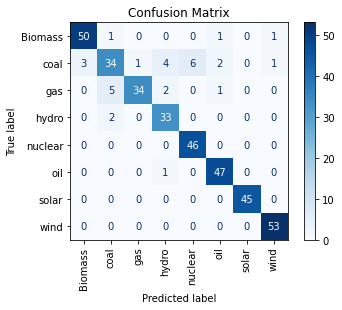

In [125]:

#i have checked that our target column is encoded in this manner
'''
0-Biomass
1-coal
2-gas
3-hydro
4-nuclear
5-oil
6-solar
7-wind

'''
class_labels = ['Biomass', 'coal', 'gas', 'hydro', 'nuclear', 'oil', 'solar', 'wind']

y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.title('Confusion Matrix')
plt.show()

### Saving the Model

In [126]:
joblib.dump(grid_search.best_estimator_,"GPPD_primary_fuel.pkl")

['GPPD_primary_fuel.pkl']

# Project Completed

#### Submitted By : Amit Kumar